In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPool2D
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Tiền xử lý dữ liệu

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True
                                  )
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/Picture/Cat and Dog/training_set',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode='binary')
# training_set = train_datagen.flow_from_directory(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\Cat and Dog\training_set',
#                                                 target_size = (64,64),
#                                                 batch_size = 32,
#                                                 class_mode='binary')

Found 8005 images belonging to 2 classes.


In [ ]:
# Load anh, chia loai, dinh lai co anh, rescale anh
test_datagen = ImageDataGenerator(rescale=1./255,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data/Picture/Cat and Dog/test_set',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode='binary',
                                                shuffle = False)

# test_set = test_datagen.flow_from_directory(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\Cat and Dog\test_set',
#                                                 target_size = (64,64),
#                                                 batch_size = 32,
#                                                 class_mode='binary',
#                                                 shuffle = False)

Found 2023 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

### Tao model

In [ ]:
# tao model
model = Sequential()

In [ ]:
#them cac layers
model.add(Conv2D(32,kernel_size =3,activation='relu',input_shape=(64,64,3),
                padding = 'same'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(Conv2D(32,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(128,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               9

### Training

In [ ]:
# THiet lap cac thong so
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics='accuracy')

In [ ]:
# Huan luyen
model.fit(x=training_set,validation_data=test_set,epochs=25)

Epoch 1/25
251/251 [==============================] - 901s 4s/step - loss: 0.6965 - accuracy: 0.5414 - val_loss: 0.7476 - val_accuracy: 0.5007
Epoch 2/25
251/251 [==============================] - 78s 310ms/step - loss: 0.6146 - accuracy: 0.6675 - val_loss: 0.5855 - val_accuracy: 0.6920
Epoch 3/25
251/251 [==============================] - 79s 315ms/step - loss: 0.5307 - accuracy: 0.7377 - val_loss: 0.5360 - val_accuracy: 0.7385
Epoch 4/25
251/251 [==============================] - 78s 310ms/step - loss: 0.4790 - accuracy: 0.7685 - val_loss: 0.5211 - val_accuracy: 0.7553
Epoch 5/25
251/251 [==============================] - 78s 311ms/step - loss: 0.4340 - accuracy: 0.7994 - val_loss: 0.5320 - val_accuracy: 0.7568
Epoch 6/25
251/251 [==============================] - 80s 319ms/step - loss: 0.4084 - accuracy: 0.8096 - val_loss: 0.5572 - val_accuracy: 0.7341
Epoch 7/25
251/251 [==============================] - 79s 313ms/step - loss: 0.3642 - accuracy: 0.8357 - val_loss: 0.5222 - val_accu

In [ ]:
model.evaluate(test_set)

64/64 [==============================] - 12s 179ms/step - loss: 1.6615 - accuracy: 0.7548


[1.6615498065948486, 0.7548195719718933]

### Kiem thu

In [ ]:
y_pred = model.predict_generator(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred_class= y_pred > 0.5
y_pred_class

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1011
           1       0.75      0.77      0.76      1012

    accuracy                           0.75      2023
   macro avg       0.76      0.75      0.75      2023
weighted avg       0.76      0.75      0.75      2023



### Du doan 1 so anh

Cat


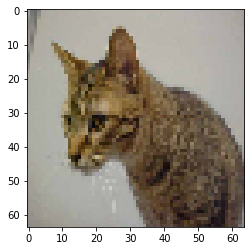

In [ ]:
# from tensorflow.keras.preprocessing import image
# test_image = image.load_img(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\Cat and Dog\test_set\cats\cat.4103.jpg',target_size=(64,64))
# test_image = image.img_to_array(test_image)
# plt.imshow(test_image/255)
# test_image = np.expand_dims(test_image,axis = 0)
# result = model.predict(test_image)
# print('Cat'if (result==False) else 'Dog')

from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Data/Picture/Cat and Dog/test_set/cats/cat.4103.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print('Cat'if (result==False) else 'Dog')

Dog


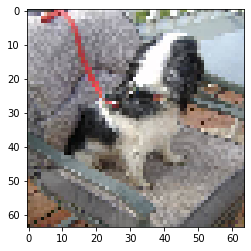

In [ ]:
# from tensorflow.keras.preprocessing import image
# test_image = image.load_img(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\Cat and Dog\test_set\dogs\dog.4103.jpg',target_size=(64,64))
# test_image = image.img_to_array(test_image)
# plt.imshow(test_image/255)
# test_image = np.expand_dims(test_image,axis = 0)
# result = model.predict(test_image)
# print('Cat'if (result==False) else 'Dog')

from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Data/Picture/Cat and Dog/test_set/dogs/dog.4103.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print('Cat'if (result==False) else 'Dog')